In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! if [ ! -d openCV ]; then mkdir openCV; fi;

In [3]:
%cd /content/drive/MyDrive/openCV/

/content/drive/MyDrive/openCV


In [4]:
!if [ ! -d ProjectMask ]; then mkdir ProjectMask; fi;
%cd ProjectMask/

/content/drive/MyDrive/openCV/ProjectMask


In [6]:
! if [ ! -d darknet ]; then ( git clone https://github.com/AlexeyAB/darknet.git;) fi;


In [5]:
%cd darknet

/content/drive/MyDrive/openCV/ProjectMask/darknet


In [8]:
%%bash
if [ ! -e darknet ]; then 
sed -i 's/OPENCV=0/OPENCV=1/' Makefile
sed -i 's/GPU=0/GPU=1/' Makefile
sed -i 's/CUDNN=0/CUDNN=1/' Makefile
echo "Building. . . It might take 2-3 minutes"
make &> build_log.txt
fi;
chmod 755 darknet
./darknet version 2>&1| grep -v Not


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0


In [9]:
!if [ ! -d dataset ]; then mkdir dataset; fi;
%cd dataset


/content/drive/My Drive/openCV/ProjectMask/darknet/dataset


In [10]:
%%bash
COUNT=`ls -c1| wc -l`
if [ ! -f 'mask_no-mask_dataset.zip' -a $COUNT -eq 0 ]; then
  wget -nd https://www.dropbox.com/s/uq0x32w70c390fb/mask_no-mask_dataset.zip?dl=1 -O mask_no-mask_dataset.zip 2>/dev/null 1>&2;
  unzip mask_no-mask_dataset.zip;
  rm mask_no-mask_dataset.zip;  
  echo "done";
fi;
echo "Data set is ready";

Archive:  mask_no-mask_dataset.zip
  inflating: 0.jpg                   
  inflating: 0.txt                   
  inflating: 1.jpeg                  
  inflating: 1.txt                   
  inflating: 10.jpeg                 
  inflating: 10.txt                  
  inflating: 100.jpg                 
  inflating: 100.txt                 
  inflating: 1000.jpg                
  inflating: 1000.txt                
  inflating: 1001.jpg                
  inflating: 1001.txt                
  inflating: 1002.jpg                
  inflating: 1002.txt                
  inflating: 1003.jpg                
  inflating: 1003.txt                
  inflating: 1004.jpg                
  inflating: 1004.txt                
  inflating: 1005.jpg                
  inflating: 1005.txt                
  inflating: 1006.jpeg               
  inflating: 1006.txt                
  inflating: 1007.jpg                
  inflating: 1007.txt                
  inflating: 1008.jpg                
  inflating: 10

In [12]:
%cd ..
!if [ ! -f test-image1.jpg ]; then wget -nd https://www.dropbox.com/s/fxei8rit9v2n83s/test-image1.jpg?dl=1 -O test-image1.jpg; fi;
!if [ ! -f test-image2.jpg ]; then wget -nd https://www.dropbox.com/s/ia1fijzr69ytpp1/test-image2.jpg?dl=1 -O test-image2.jpg; fi;
!if [ ! -f test-image3.jpg ]; then wget -nd https://www.dropbox.com/s/g905k4r1git5kbx/test-image3.jpg?dl=1 -O test-image3.jpg; fi;
!if [ ! -f test-image4.jpg ]; then wget -nd https://www.dropbox.com/s/90ggmiur7b8g35m/test-image4.jpg?dl=1 -O test-image4.jpg; fi;
!if [ ! -f test-video1.mp4 ]; then wget -nd https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1 -O test-video1.mp4; fi;
!if [ ! -f test-video2.mp4 ]; then wget -nd https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1 -O test-video2.mp4; fi;

/content/drive/My Drive/openCV/ProjectMask/darknet
--2021-03-03 19:31:10--  https://www.dropbox.com/s/fxei8rit9v2n83s/test-image1.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/fxei8rit9v2n83s/test-image1.jpg [following]
--2021-03-03 19:31:11--  https://www.dropbox.com/s/dl/fxei8rit9v2n83s/test-image1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc681c784e5ce42a58ccbb5c786e.dl.dropboxusercontent.com/cd/0/get/BKAWjkJhuU4Us4Oe90RDPMAHNmh4b_tYB1cCI_xRUmGTqhprHeSn0UXktI7YzlskOakJB7h-RBP2ypxHdm_Sqk2iPot9nVBZUSVU1jIskgCRBVYwZhfKg7BGj6ShAtES4M4/file?dl=1# [following]
--2021-03-03 19:31:11--  https://uc681c784e5ce42a58ccbb5c786e.dl.dropboxusercontent.com/cd/0/get/BKAWjkJhuU4Us4Oe90RDPMAHNmh4b_tYB1cCI_xRUmGTqhprH

In [16]:
import random
import os
import subprocess
import sys

image_dir = "./dataset"
f_val = open("obj_test.txt", 'w')
f_train = open("obj_train.txt", 'w')

path, dirs, files = next(os.walk(image_dir))
files = list(filter(lambda x : x.endswith('txt') == False, files))
data_size = len(files)
ind = 0
data_test_size = int(0.2 * data_size)
test_array = random.sample(range(data_size), k=data_test_size)

for f in files:
    ind += 1
        
    if ind in test_array:
        f_val.write(image_dir+'/'+f+'\n')
    else:
        f_train.write(image_dir+'/'+f+'\n')

f_train.close()
f_val.close()

271 obj_test.txt


In [18]:
!cp cfg/yolov3.cfg yolo-obj.cfg

In [61]:
!sed -i 's/^batch=1/batch=64/' yolo-obj.cfg
!sed -i 's/^subdivisions=32.*$/subdivisions=16/' yolo-obj.cfg
!sed -i 's/^max_batches = 500200/max_batches=6000/' yolo-obj.cfg
!sed -i 's/^steps=.*$/steps=4800,5400/' yolo-obj.cfg
!sed -i 's/^classes=.*$/classes=2/' yolo-obj.cfg
!sed -i 's/^filters=255$/filters=21/' yolo-obj.cfg




In [43]:
!echo "classes = 2" > obj.data
!echo "train = obj_train.txt">>obj.data
!echo "valid = obj_test.txt">>obj.data
!echo "names = obj.names">>obj.data
!echo "backup = backup/">>obj.data
!cat obj.data

classes = 2
train = obj_train.txt
valid = obj_test.txt
names = obj.names
backup = backup/


In [44]:
!echo "mask" > obj.names
!echo "nomask" >> obj.names
!cat obj.names

mask
nomask


In [47]:
!wget https://pjreddie.com/media/files/darknet53.conv.74 -O darknet53.conv.74

--2021-03-03 19:57:17--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  44.6MB/s    in 3.9s    

2021-03-03 19:57:21 (40.2 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [11]:
!if [ ! -d backup  ]; then mkdir backup; fi;
!chmod 700 ./darknet
!./darknet detector train obj.data yolo-obj.cfg darknet53.conv.74 -dont_show -map 2 | tee train_log2.txt


Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.830706), count: 22, class_loss = 0.465168, iou_loss = 0.820050, total_loss = 1.285218 
 total_bbox = 869257, rewritten_bbox = 0.243771 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.821978), count: 10, class_loss = 0.360160, iou_loss = 0.229654, total_loss = 0.589813 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.830398), count: 17, class_loss = 0.068320, iou_loss = 0.321633, total_loss = 0.389953 
 total_bbox = 869284, rewritten_bbox = 0.243764 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.604506), count: 1, class_loss = 0.226896, iou_loss = 0.082056, total_loss = 0.308952 
v3

In [7]:
!ls -lr backup/

total 2164986
-rw------- 1 root root 246326928 Mar  4 07:43 yolo-obj_last.weights
-rw------- 1 root root 246326928 Mar  4 07:43 yolo-obj_final.weights
-rw------- 1 root root 246326928 Mar  4 07:43 yolo-obj_best.weights
-rw------- 1 root root 246326928 Mar  4 07:43 yolo-obj_6000.weights
-rw------- 1 root root 246326928 Mar  4 05:58 yolo-obj_5000.weights
-rw------- 1 root root 246326928 Mar  4 04:12 yolo-obj_4000.weights
-rw------- 1 root root 246326928 Mar  4 01:18 yolo-obj_3000.weights
-rw------- 1 root root 246326928 Mar  3 23:34 yolo-obj_2000.weights
-rw------- 1 root root 246326928 Mar  3 21:49 yolo-obj_1000.weights


In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

In [31]:
!if [ ! -f yolo-detect.cfg ]; then cp yolo-obj.cfg yolo-detect.cfg; fi;
!sed -i 's/batch=64/batch=1/' yolo-detect.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolo-detect.cfg


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

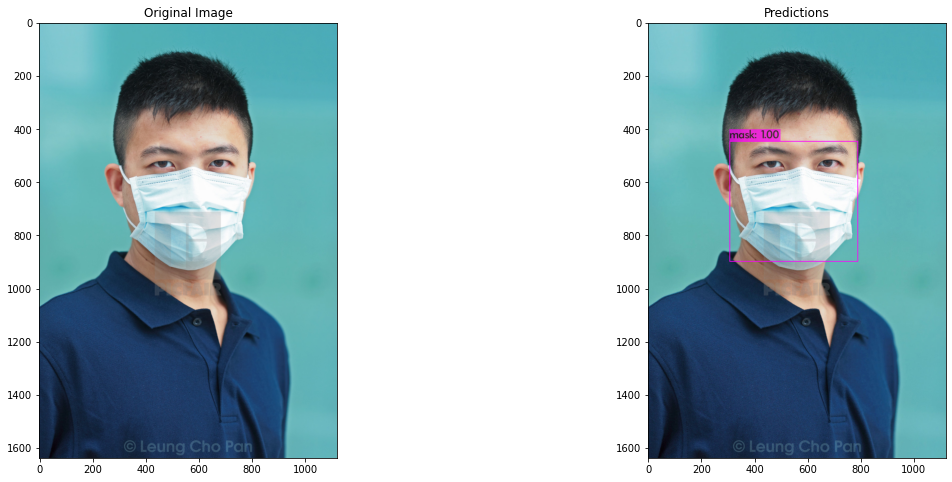

In [21]:
!chmod a+x darknet
!./darknet detector test obj.data yolo-detect.cfg backup/yolo-obj_final.weights test-image1.jpg -thresh .6
display_output("test-image1.jpg")

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

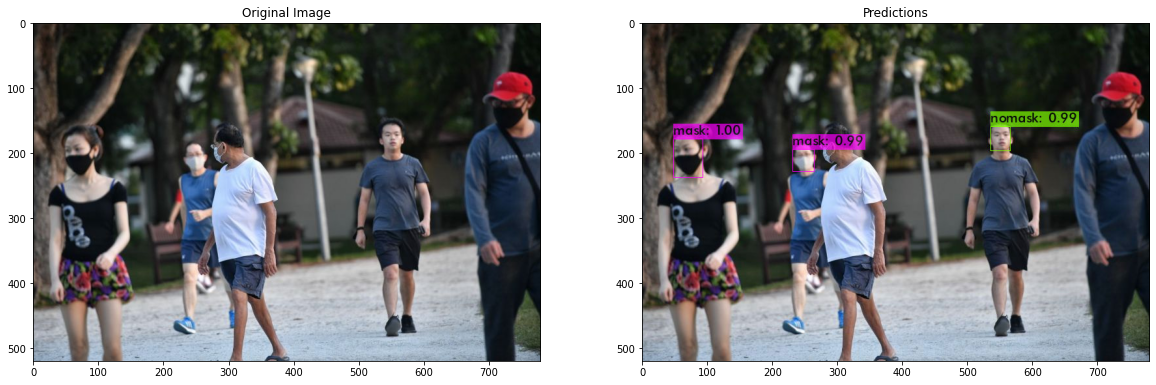

In [22]:
!./darknet detector test obj.data yolo-detect.cfg backup/yolo-obj_final.weights test-image2.jpg -thresh .6
display_output("test-image2.jpg")

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

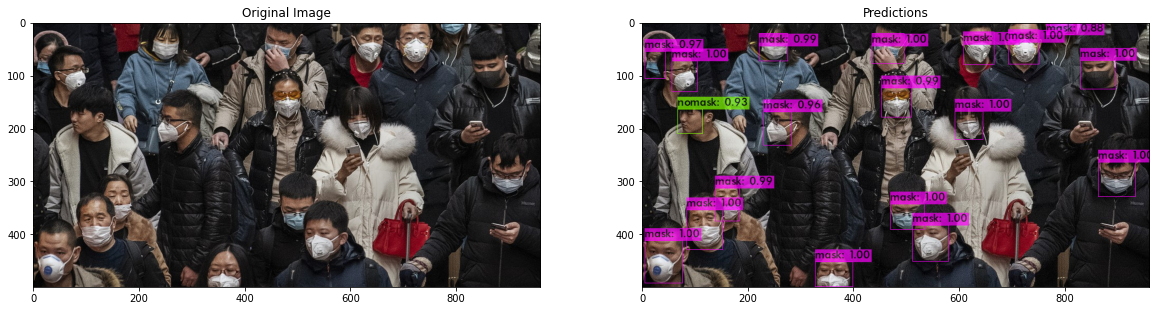

In [23]:
!./darknet detector test obj.data yolo-detect.cfg backup/yolo-obj_final.weights test-image3.jpg -thresh .6
display_output("test-image3.jpg")

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

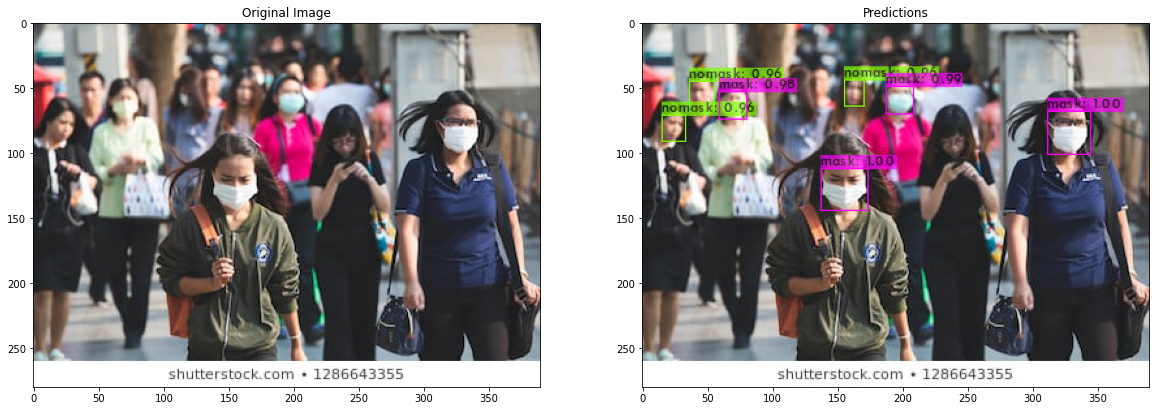

In [24]:
!./darknet detector test obj.data yolo-detect.cfg backup/yolo-obj_final.weights test-image4.jpg -thresh .6
display_output("test-image4.jpg")

In [30]:
!./darknet detector demo obj.data yolo-detect.cfg backup/yolo-obj_final.weights test-video1.mp4 -thresh .6 -out_filename out-vid.avi -dont_show 2>/dev/null 1>&2
print("Done.")

Done.


In [29]:
!./darknet detector demo obj.data yolo-detect.cfg backup/yolo-obj_final.weights test-video2.mp4 -thresh .6 -out_filename out-vid2.avi -dont_show 2>/dev/null 1>&2
print("Done.")

Done.
